# Certificate in Data Science | Assignment 1 |  
- Energy Loads

> University of Washington  
> June 2019  
> N. HICKS

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


Tip:  
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

# EXPLORATORY DATA ANALYSIS (EDA)  
> The following evaluations are accomplsihed in order to interpret the dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

## BASIC DATASET DESCRIPTION AND UNDERSTANDING  
> Initially, inspect the various aspects of the dataset in order to become familiar with it.  
> Then begin to ask questions that are supported by the features.

In [4]:
## Read the .csv file with the pandas read_csv method
energyLoads = pd.read_csv(fileName)
# Report the Head() of the DataFrame
energyLoads.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
# Report the Tail() of the DataFrame
energyLoads.tail()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [6]:
# Report the statistical perspectives of the dataset
energyLoads.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
# show the dataTypes of the dataset
energyLoads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative Compactness         768 non-null float64
Surface Area                 768 non-null float64
Wall Area                    768 non-null float64
Roof Area                    768 non-null float64
Overall Height               768 non-null float64
Orientation                  768 non-null int64
Glazing Area                 768 non-null float64
Glazing Area Distribution    768 non-null int64
Heating Load                 768 non-null float64
Cooling Load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
# Discover the uniqueness
energyLoads['Orientation'].unique()

array([2, 3, 4, 5], dtype=int64)

In [9]:
# Discover the uniqueness
energyLoads['Glazing Area Distribution'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

## TABULATED RESULTS  
> Note: A 'counts' feature is created to report frequencies of the underlying data.

In [10]:
# Discover the tabulated aspects of Heat Loading
energyLoads['counts'] = 1
energyLoads[['Glazing Area Distribution', 'Surface Area', 'counts']].groupby(['Glazing Area Distribution']).agg('count')

,Surface Area,counts
Glazing Area Distribution,,
0,48,48
1,144,144
2,144,144
3,144,144
4,144,144
5,144,144


In [11]:
# Discover the tabulated aspects of Heat Loading
energyLoads[['Glazing Area Distribution', 'Heating Load', 'Cooling Load', 'counts']].groupby(['Glazing Area Distribution']).agg('count')

,Heating Load,Cooling Load,counts
Glazing Area Distribution,,,
0,48,48,48
1,144,144,144
2,144,144,144
3,144,144,144
4,144,144,144
5,144,144,144


## BAR CHARTS  
> Various aspects of the dataset features are derived, below, to better understand its characteristics.

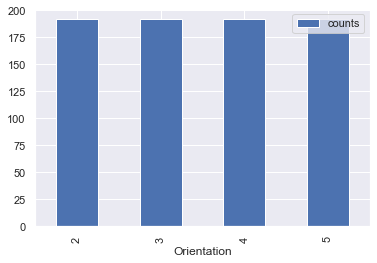

In [12]:
# plot the distribution of the resultant count values using a bar chart
energyLoads.loc[:, ['Orientation', 'counts']].groupby(['Orientation']).agg('count').plot.bar()

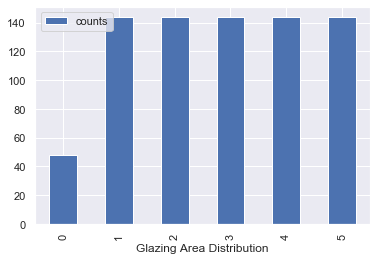

In [13]:
# plot the distribution of the resultant count values using a bar chart
energyLoads.loc[:, ['Glazing Area Distribution', 'counts']].groupby(['Glazing Area Distribution']).agg('count').plot.bar()

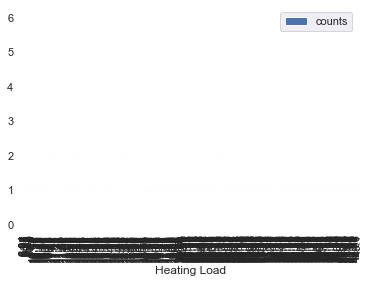

In [14]:
# plot the distribution of the resultant count values using a bar chart
energyLoads.loc[:, ['Heating Load', 'counts']].groupby(['Heating Load']).agg('count').plot.bar()

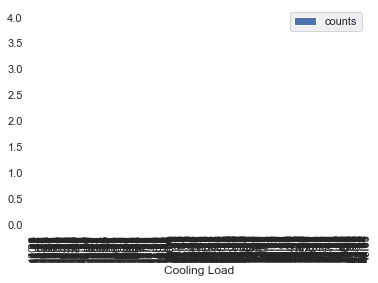

In [15]:
# plot the distribution of the resultant count values using a bar chart
energyLoads.loc[:, ['Cooling Load', 'counts']].groupby(['Cooling Load']).agg('count').plot.bar()

## HISTOGRAM PLOTS  
> Observe the bi-modal behavior of the Heating and Cooling Loads  
> Note: Heating and Cooling Loads (efficiencies) are correlated outcomes.

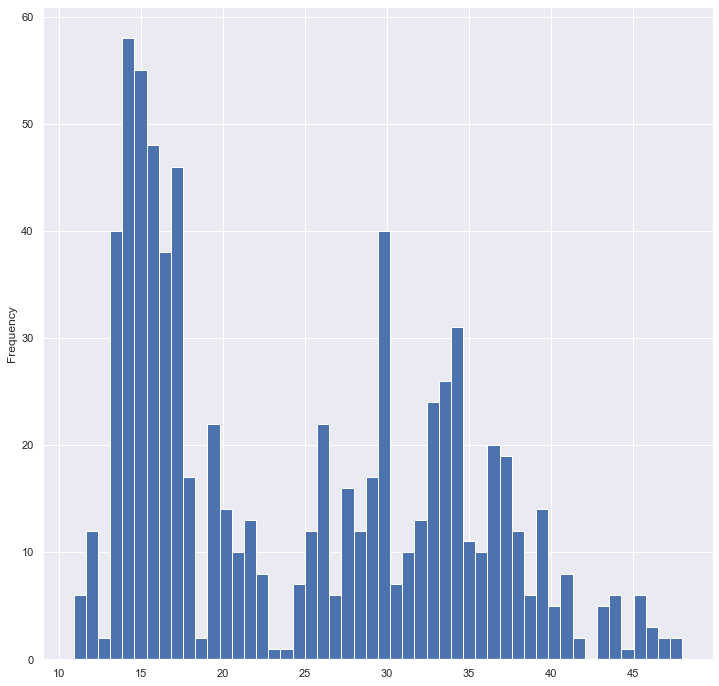

In [16]:
# plot the distribution of the frequency count using a histogram chart
# NOTE: observe the bi-modal behavior
fig = plt.figure(figsize=(12, 12)) # Define plot area
energyLoads.loc[:,'Cooling Load'].plot.hist(bins = 50)

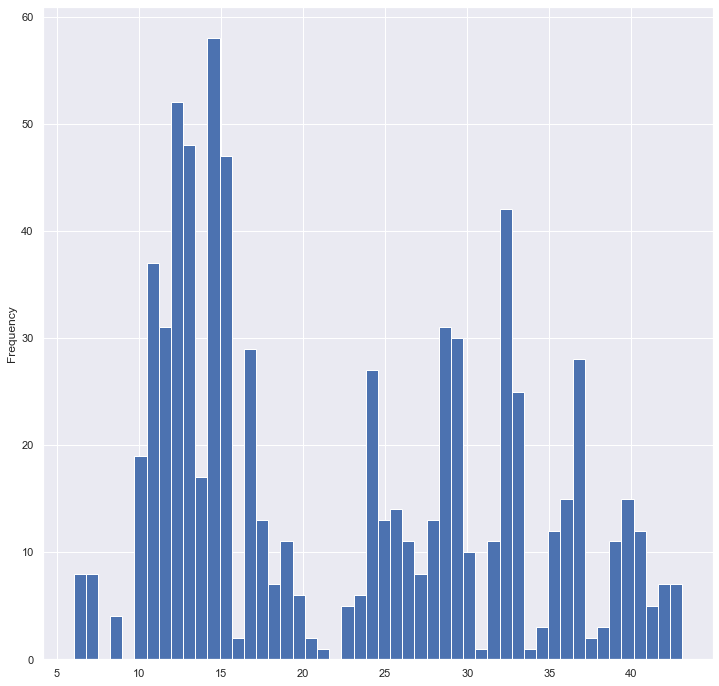

In [17]:
# plot the distribution of the frequency count using a histogram chart
# NOTE: observe the bi-modal behavior
fig = plt.figure(figsize=(12, 12)) # Define plot area
energyLoads.loc[:,'Heating Load'].plot.hist(bins = 50)

## BOX PLOTS  
> The box plots will indicate a more specific set of relationships than what has already been established, above.

Text(0.5, 0, 'Breakdown of Orientation')

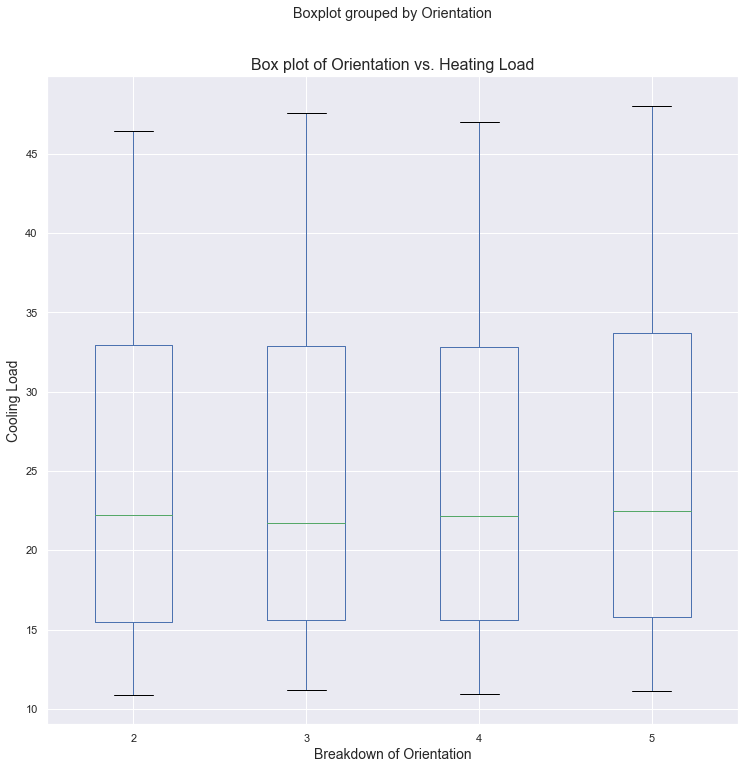

In [18]:
# Determine if 'Orientation' is a significant feature of the building effeciencies
# NOTE: all categories appear similar
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Cooling Load', 'Orientation']].boxplot(by = ['Orientation'], ax = ax)
ax.set_title('Box plot of Orientation vs. Heating Load', fontsize=16) # Give the plot a main title
ax.set_ylabel('Cooling Load', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Orientation', fontsize=14) #Set text for y-axis

Text(0.5, 0, 'Breakdown of Glazing Area Distn')

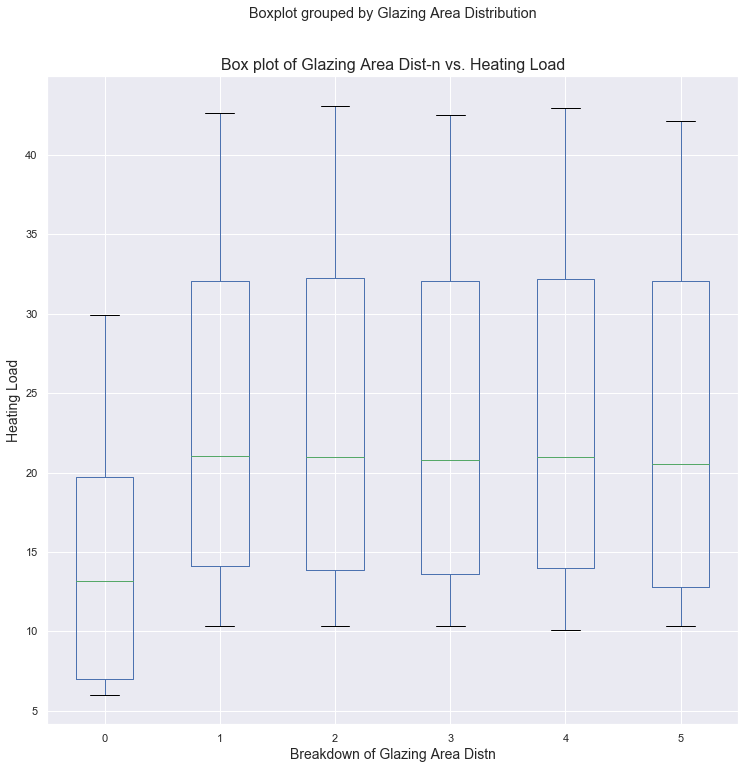

In [19]:
import matplotlib.pyplot as plt
# Determine if 'Glazing Area Distribution' is a significant feature of the building effeciencies
# NOTE: 1 category shows atypical behavior
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Heating Load', 'Glazing Area Distribution']].boxplot(by = ['Glazing Area Distribution'], ax = ax)
ax.set_title('Box plot of Glazing Area Dist-n vs. Heating Load', fontsize=16) # Give the plot a main title
ax.set_ylabel('Heating Load', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Glazing Area Distn', fontsize=14) #Set text for y-axis

Text(0.5, 0, 'Breakdown of Glazing Area Distn')

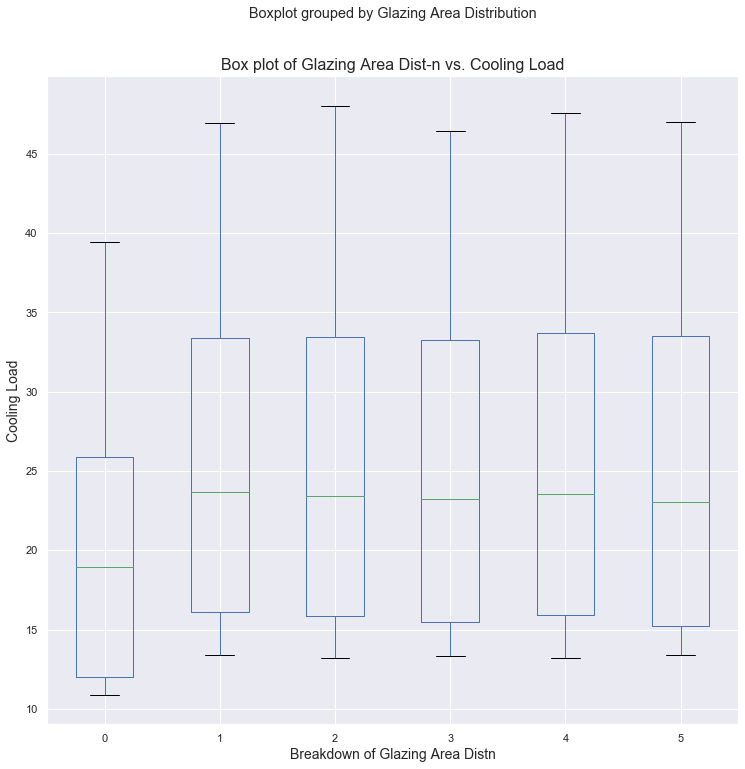

In [20]:
# Determine if 'Glazing Area Distribution' is a significant feature of the building effeciencies
# NOTE: 1 category shows atypical behavior
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Cooling Load', 'Glazing Area Distribution']].boxplot(by = ['Glazing Area Distribution'], ax = ax)
ax.set_title('Box plot of Glazing Area Dist-n vs. Cooling Load', fontsize=16) # Give the plot a main title
ax.set_ylabel('Cooling Load', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Glazing Area Distn', fontsize=14) #Set text for y-axis

Text(0.5, 0, 'Breakdown of Surface Area')

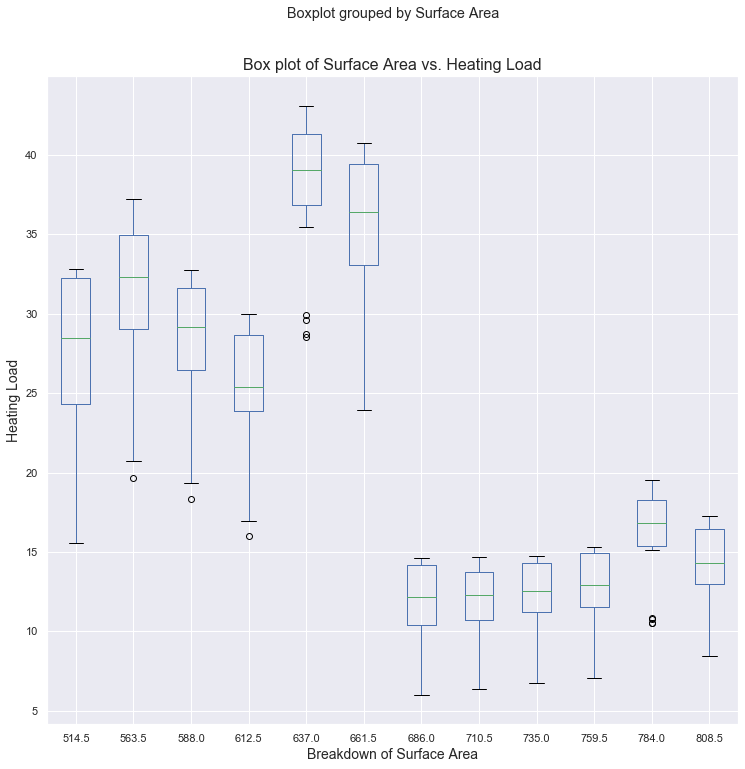

In [21]:
# Determine if 'Surface Area' is a significant feature of the building effeciencies
# NOTE: observe the distinct clustering
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Heating Load', 'Surface Area']].boxplot(by = ['Surface Area'], ax = ax)
ax.set_title('Box plot of Surface Area vs. Heating Load', fontsize=16) # Give the plot a main title
ax.set_ylabel('Heating Load', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Surface Area', fontsize=14) #Set text for y-axis

Text(0.5, 0, 'Breakdown of Surface Area')

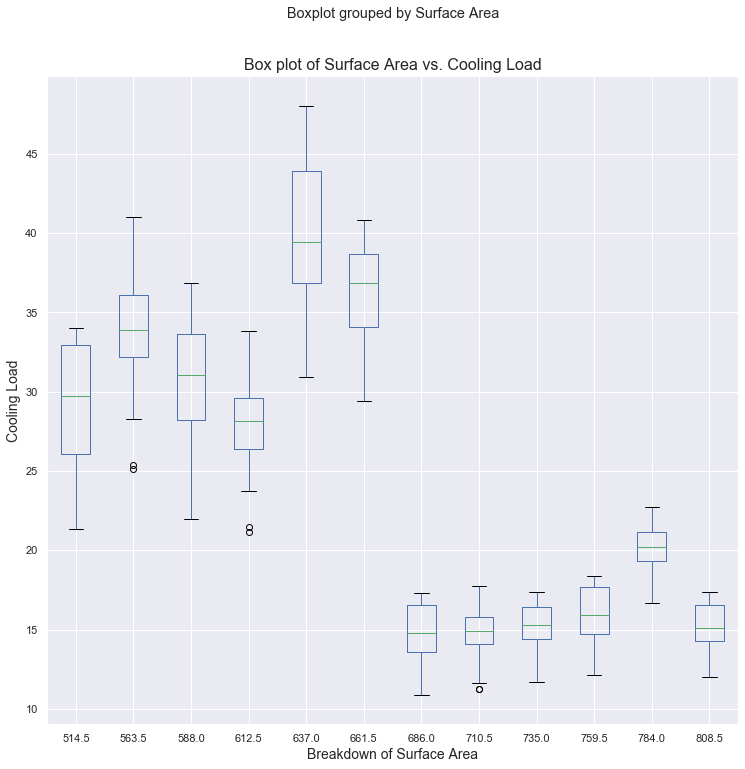

In [22]:
# Determine if 'Surface Area' is a significant feature of the building effeciencies
# NOTE: observe the distinct clustering
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Cooling Load', 'Surface Area']].boxplot(by = ['Surface Area'], ax = ax)
ax.set_title('Box plot of Surface Area vs. Cooling Load', fontsize=16) # Give the plot a main title
ax.set_ylabel('Cooling Load', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Surface Area', fontsize=14) #Set text for y-axis

Text(0.5, 0, 'Breakdown of Roof Area')

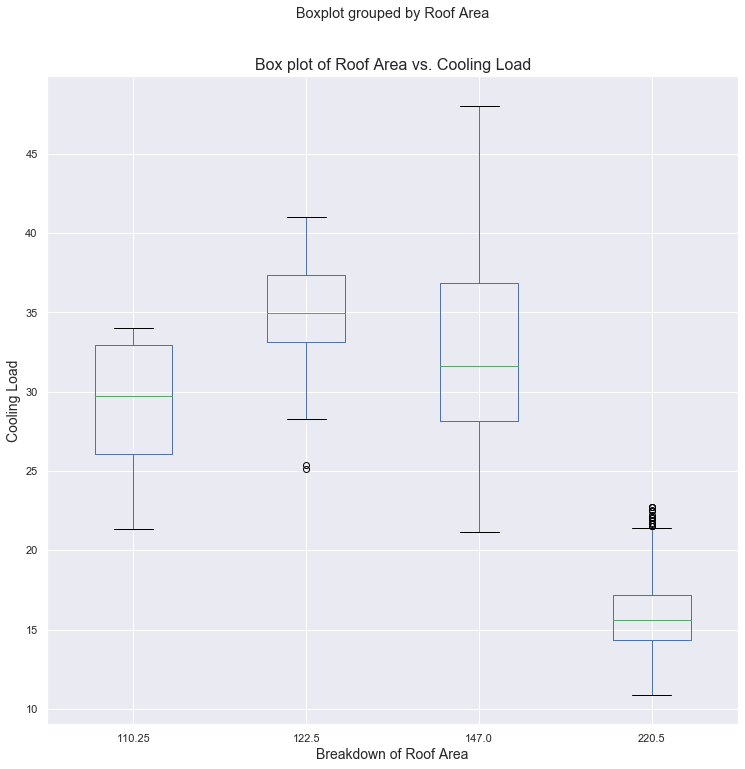

In [23]:
# Determine if 'Roof Area' is a significant feature of the building effeciencies
# NOTE: 1 category is aytipcal of the others
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Cooling Load', 'Roof Area']].boxplot(by = ['Roof Area'], ax = ax)
ax.set_title('Box plot of Roof Area vs. Cooling Load', fontsize=16) # Give the plot a main title
ax.set_ylabel('Cooling Load', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Roof Area', fontsize=14) #Set text for y-axis

Text(0.5, 0, 'Breakdown of Wall Area')

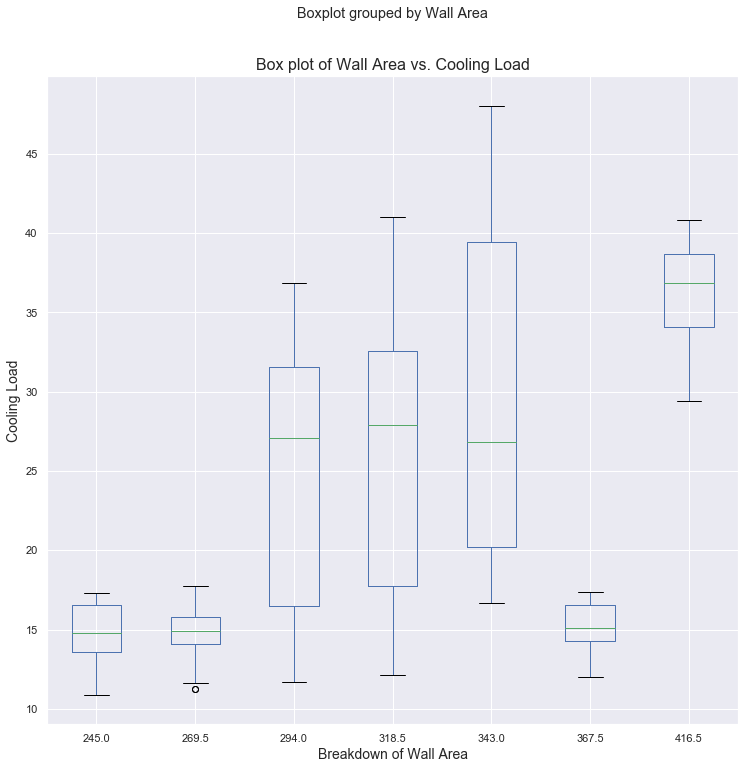

In [24]:
# Determine if 'Wall Area' is a significant feature of the building effeciencies
# NOTE: overall, the spread of data points has no outliers
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Cooling Load', 'Wall Area']].boxplot(by = ['Wall Area'], ax = ax)
ax.set_title('Box plot of Wall Area vs. Cooling Load', fontsize=16) # Give the plot a main title
ax.set_ylabel('Cooling Load', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Wall Area', fontsize=14) #Set text for y-axis

Text(0.5, 0, 'Breakdown of Relative Compactness')

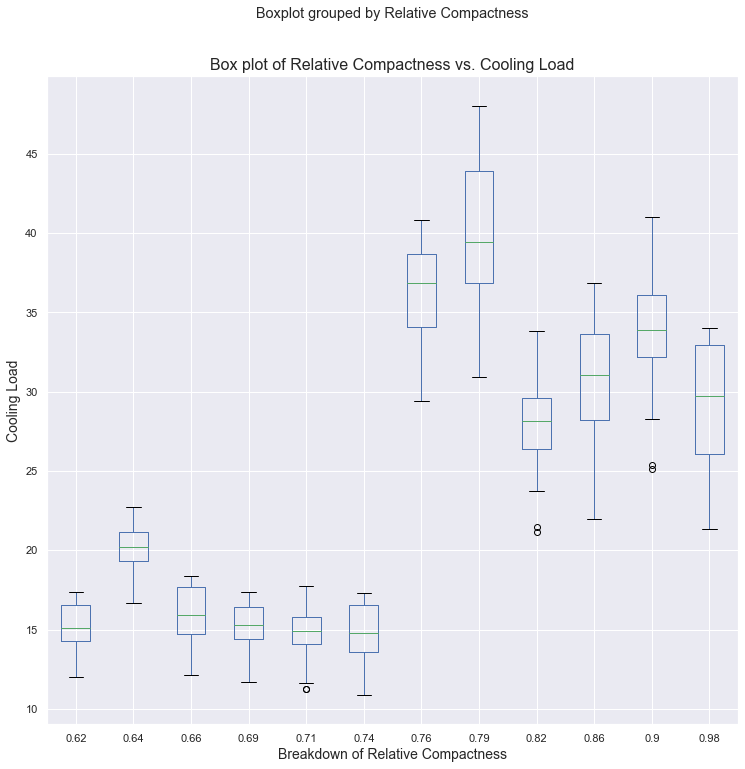

In [25]:
# Determine if 'Relative Compactness' is a significant feature of the building effeciencies
# NOTE: observe the clustering of data
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Cooling Load', 'Relative Compactness']].boxplot(by = ['Relative Compactness'], ax = ax)
ax.set_title('Box plot of Relative Compactness vs. Cooling Load', fontsize=16) # Give the plot a main title
ax.set_ylabel('Cooling Load', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Relative Compactness', fontsize=14) #Set text for y-axis

Text(0.5, 0, 'Breakdown of Overall Height')

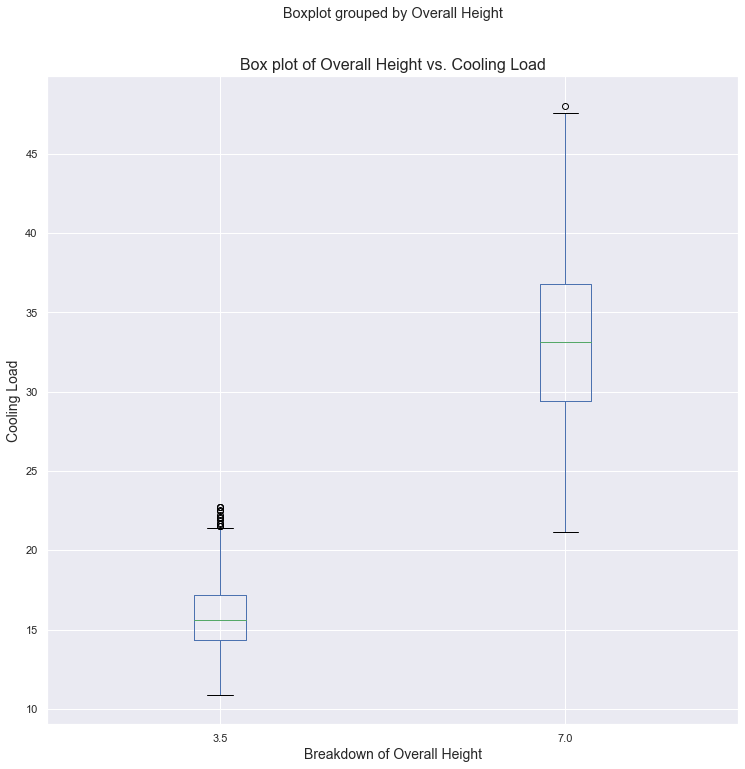

In [26]:
# Determine if 'Overall Height' is a significant feature of the building effeciencies
# NOTE: observe the clustering of data
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Cooling Load', 'Overall Height']].boxplot(by = ['Overall Height'], ax = ax)
ax.set_title('Box plot of Overall Height vs. Cooling Load', fontsize=16) # Give the plot a main title
ax.set_ylabel('Cooling Load', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Overall Height', fontsize=14) #Set text for y-axis

Text(0.5, 0, 'Breakdown of Overall Height')

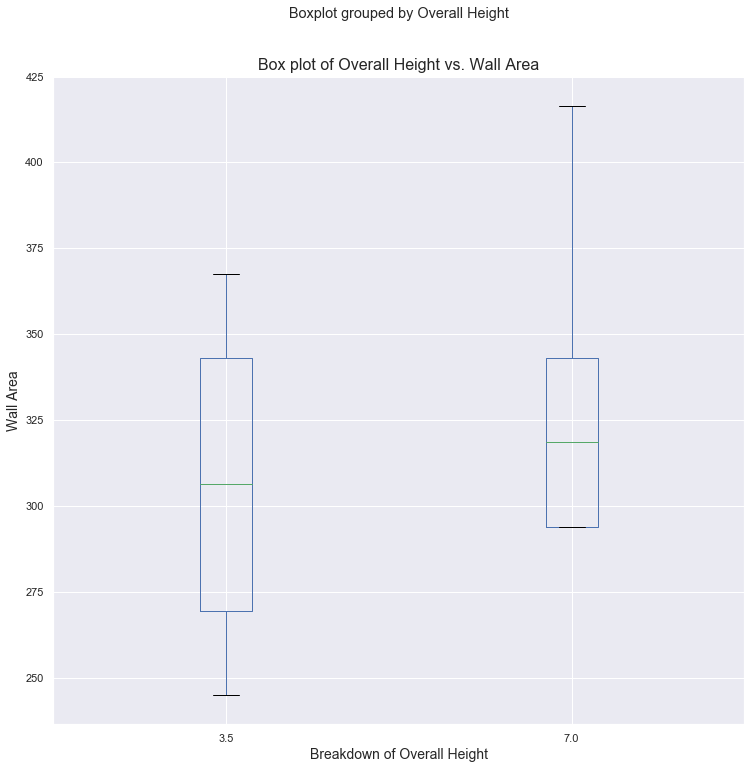

In [27]:
# Determine if 'Overall Height' is a significant feature of the building effeciencies
# NOTE: observe the clustering of data
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Wall Area', 'Overall Height']].boxplot(by = ['Overall Height'], ax = ax)
ax.set_title('Box plot of Overall Height vs. Wall Area', fontsize=16) # Give the plot a main title
ax.set_ylabel('Wall Area', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Overall Height', fontsize=14) #Set text for y-axis

Text(0.5, 0, 'Breakdown of Glazing Area')

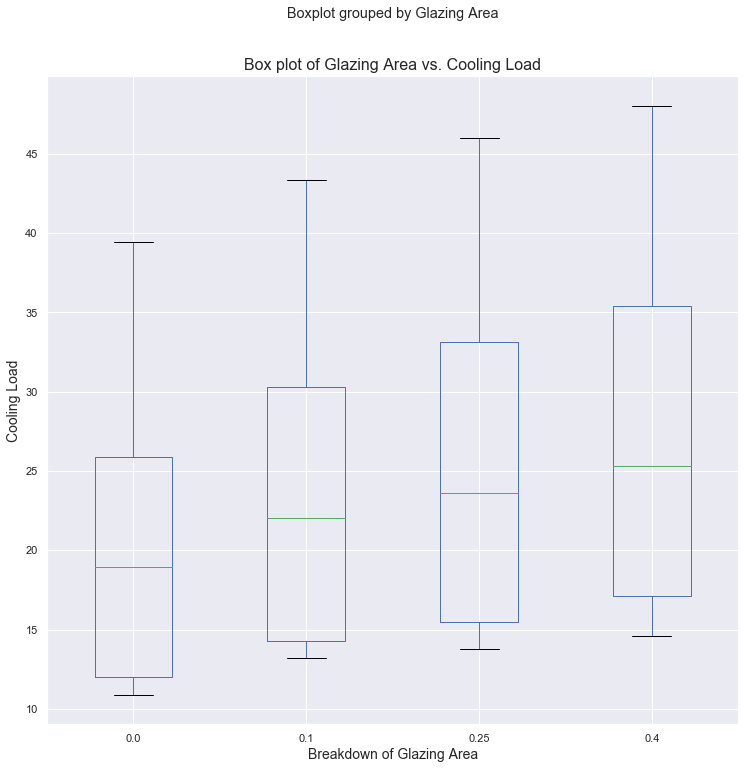

In [28]:
# Determine if 'Glazing Area' is a significant feature of the building effeciencies
# NOTE: a small positive slope is associated with this attribute across values
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energyLoads.loc[:,['Cooling Load', 'Glazing Area']].boxplot(by = ['Glazing Area'], ax = ax)
ax.set_title('Box plot of Glazing Area vs. Cooling Load', fontsize=16) # Give the plot a main title
ax.set_ylabel('Cooling Load', fontsize=14) #Set text for y-axis
ax.set_xlabel('Breakdown of Glazing Area', fontsize=14) #Set text for y-axis

## VIOLIN PLOTS  
> The violin plots below allow for an additional feature added to the plot for further improved evidence of correaltions between them.

Text(0, 0.5, 'Cooling Load')

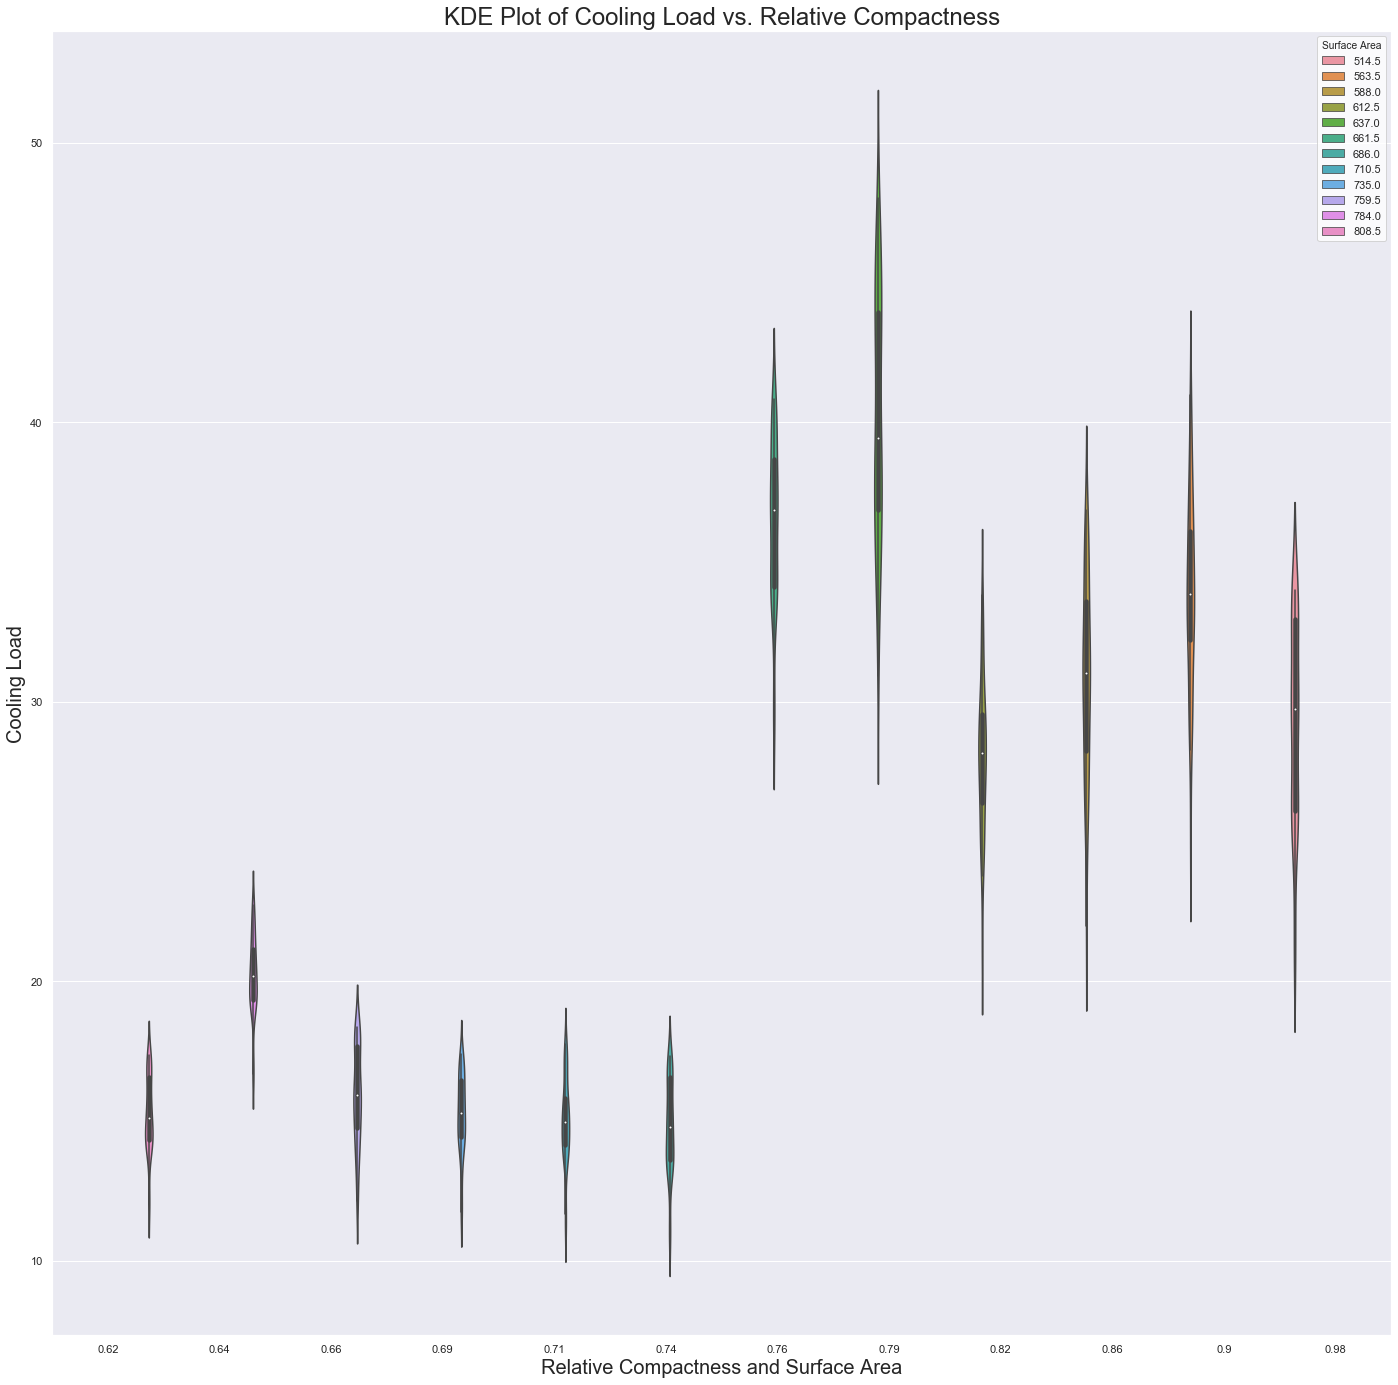

In [29]:
import seaborn as sns
# Inspection of a 3rd attribute can show additional correlations using a violin plot
# NOTE: the surface area is observed correlated both with relative compactness and the building efficiencies.
fig = plt.figure(figsize=(24,24)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Relative Compactness', y = 'Cooling Load', hue = 'Surface Area', data = energyLoads, ax = ax)
ax.set_title('KDE Plot of Cooling Load vs. Relative Compactness', fontsize=24) # Give the plot a main title
ax.set_xlabel('Relative Compactness and Surface Area', fontsize=20) # Set text for the x axis
ax.set_ylabel('Cooling Load', fontsize=20)  # Set text for y axis

Text(0, 0.5, 'Heating Load')

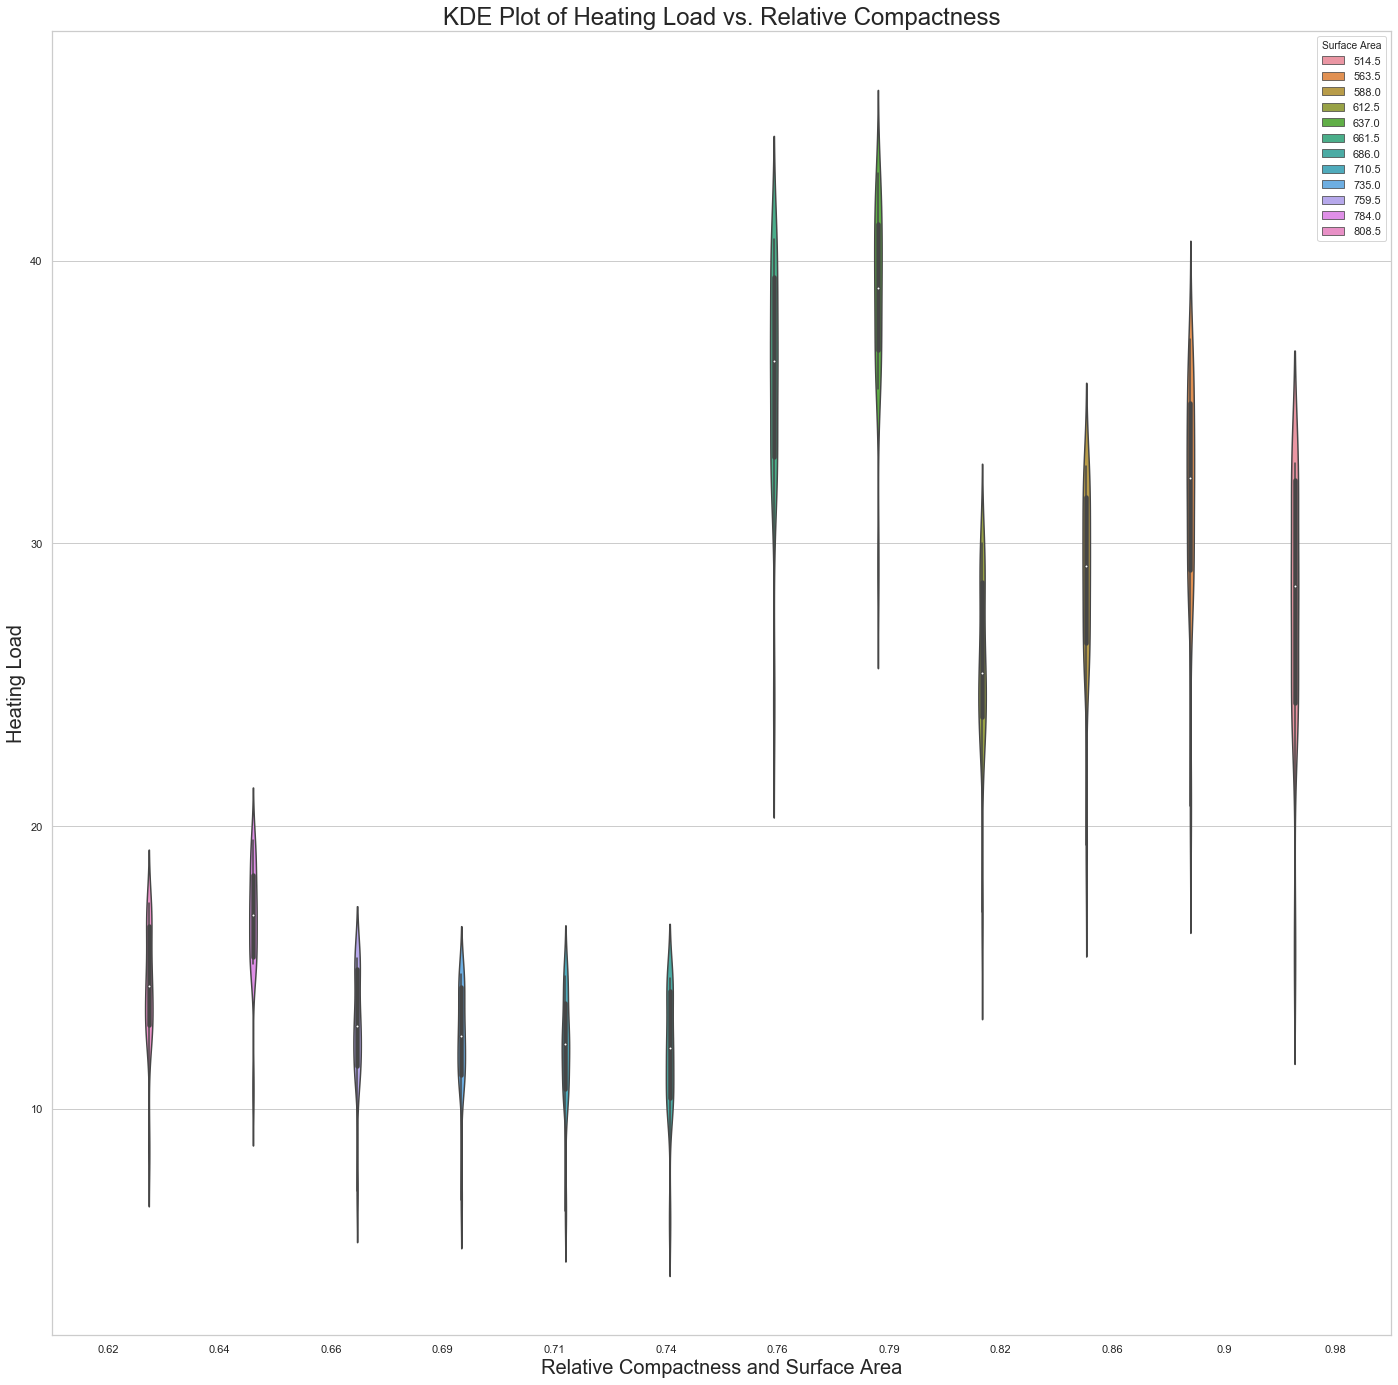

In [30]:
# Inspection of a 3rd attribute can show additional correlations using a violin plot
# NOTE: the surface area is observed correlated both with relative compactness and the building efficiencies.
fig = plt.figure(figsize=(24,24)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Relative Compactness', y = 'Heating Load', hue = 'Surface Area', data = energyLoads, ax = ax)
ax.set_title('KDE Plot of Heating Load vs. Relative Compactness', fontsize=24) # Give the plot a main title
ax.set_xlabel('Relative Compactness and Surface Area', fontsize=20) # Set text for the x axis
ax.set_ylabel('Heating Load', fontsize=20)  # Set text for y axis

Text(0, 0.5, 'Cooling Load')

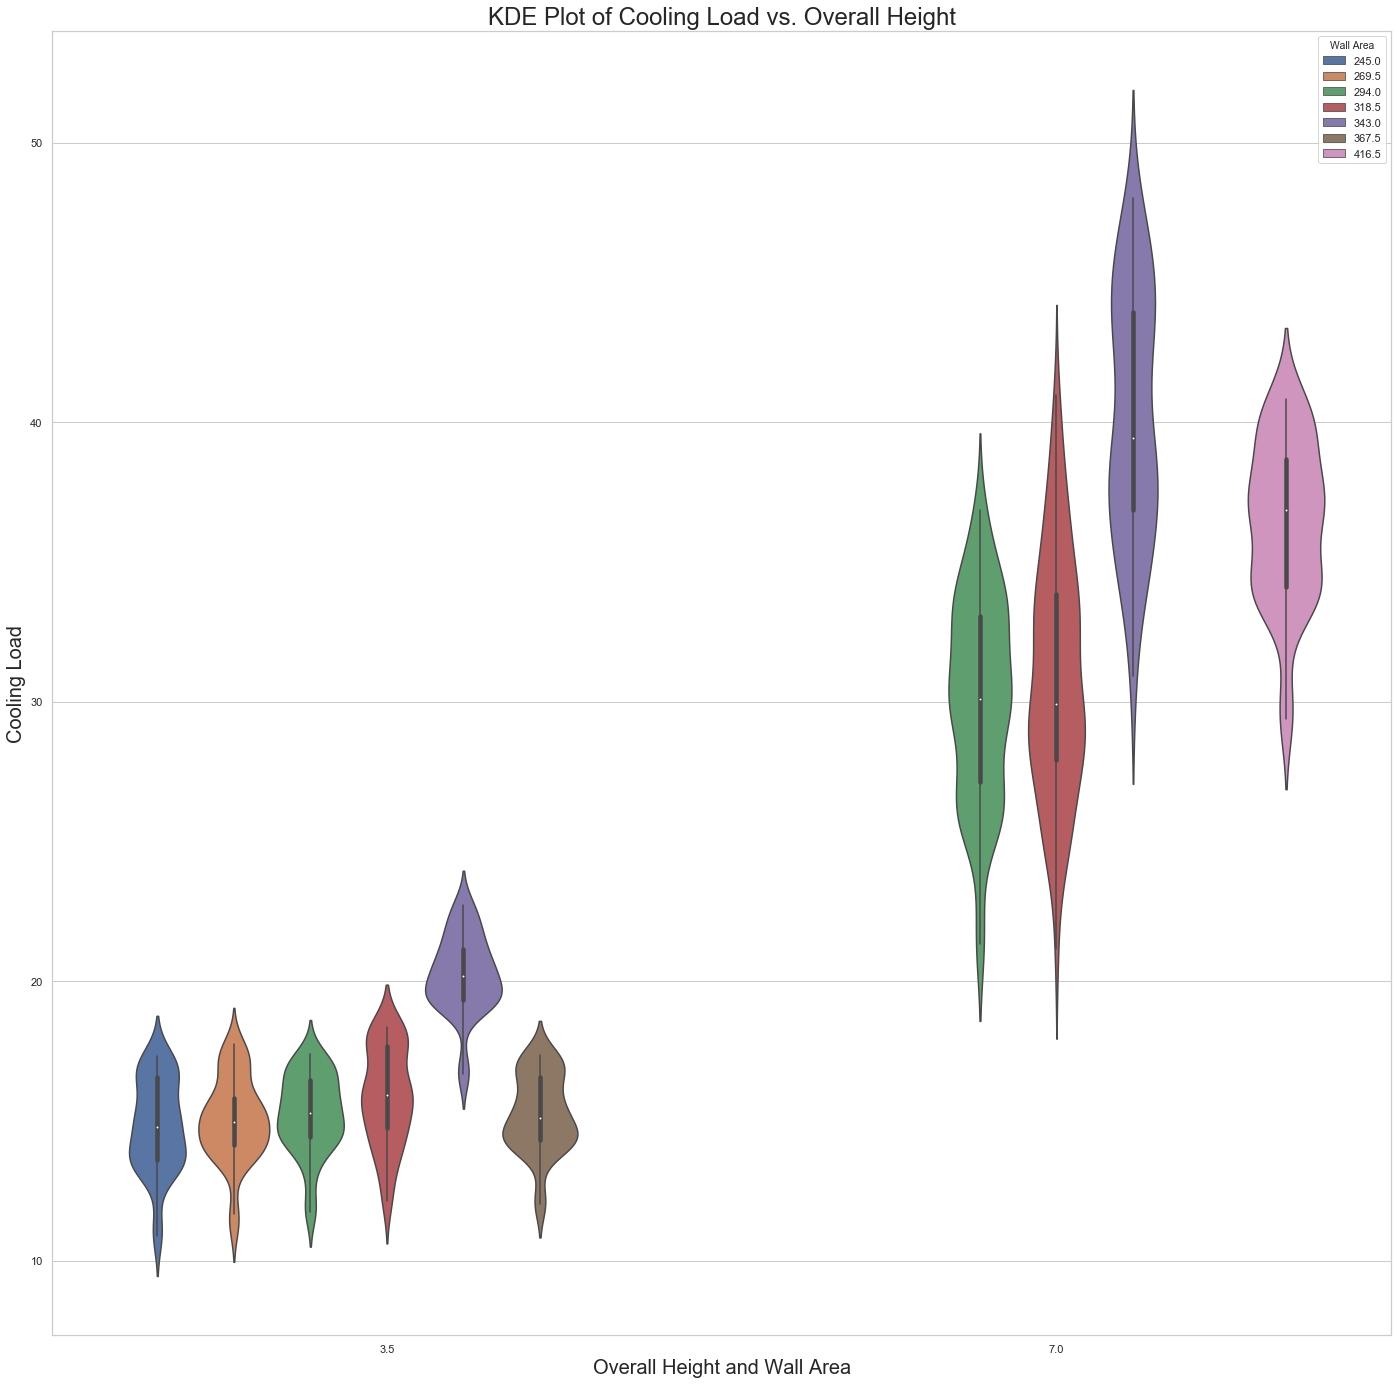

In [31]:
# Inspection of a 3rd attribute can show additional correlations using a violin plot
# NOTE: the wall area is observed correlated both with overall height and the building efficiencies.
fig = plt.figure(figsize=(24,24)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Overall Height', y = 'Cooling Load', hue = 'Wall Area', data = energyLoads, ax = ax)
ax.set_title('KDE Plot of Cooling Load vs. Overall Height', fontsize=24) # Give the plot a main title
ax.set_xlabel('Overall Height and Wall Area', fontsize=20) # Set text for the x axis
ax.set_ylabel('Cooling Load', fontsize=20)  # Set text for y axis

# FINAL RESULTS AND CONCLUSIONS  
  
The primary goals for this assignement are to identify in-building environmental efficiencies characteristics based on a provided feature set of data points.  
  
For this assignment, the following aspects are addressed:  
- Identify 3 interesting correlations of the provided dataset.  
- Provide evidence from your work in support of your 3 correlations.


## ASSIGNMENT RESPONSES  
>3 primary correlations are identified within the provided datatset that describe the in-building heating/cooling loads (efficiencies) according to the provided dataset.  
  
It can be seen from the Heating and Cooling Loads bar charts, below, that some variance in data exists for these features. The result suggests that some interesting aspects can further be sought.  
  
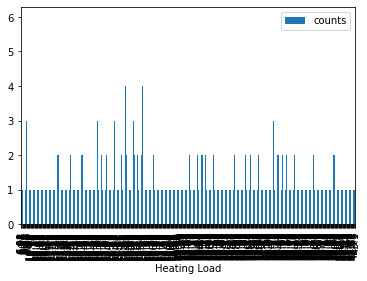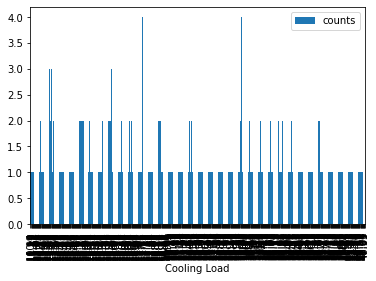  
  
Observe the bi-modal behavior of the same data, respectively, using a histogram plot:  
  
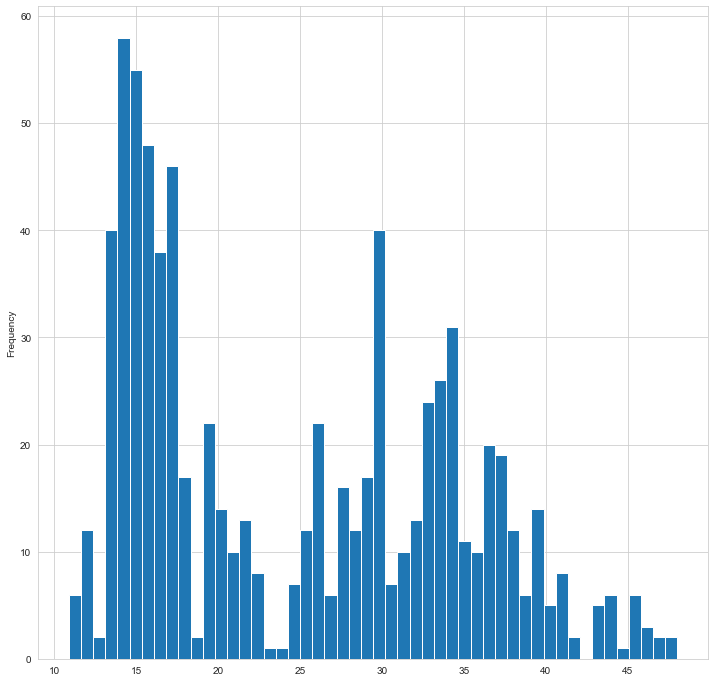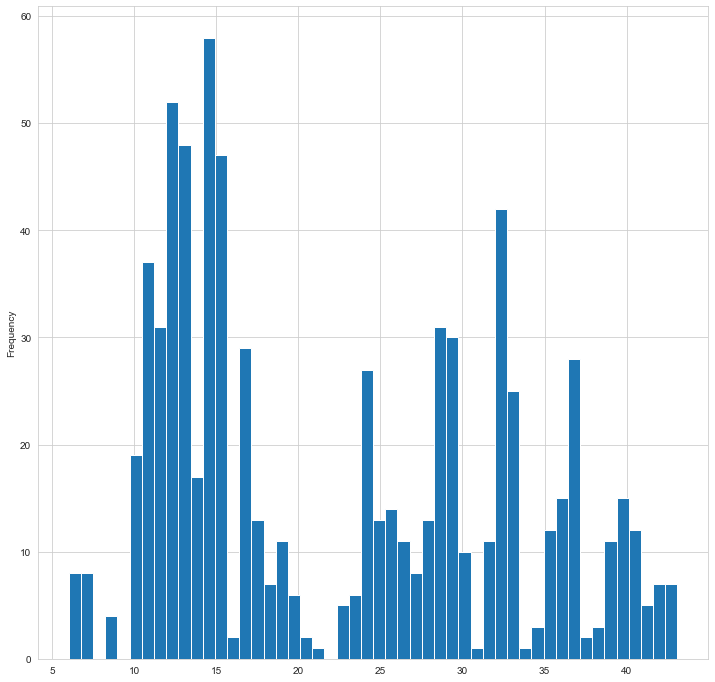

### FEATURE CORRELATION 1  
> Correlations exist between the 'Glazing Area Distribution' feature and the in-building efficiencies.  
  
> By visual inspection of the following 2 box plots below, it is shown that both the Heating and Cooling Load features with a glazing area distribution of 0 give a reduced load (efficiency) as compared to the other glazing area distribution categories. Based upon the prior histogram plot results, these box plots help confirm more specifically the type of variance within the datatsets values.

>> 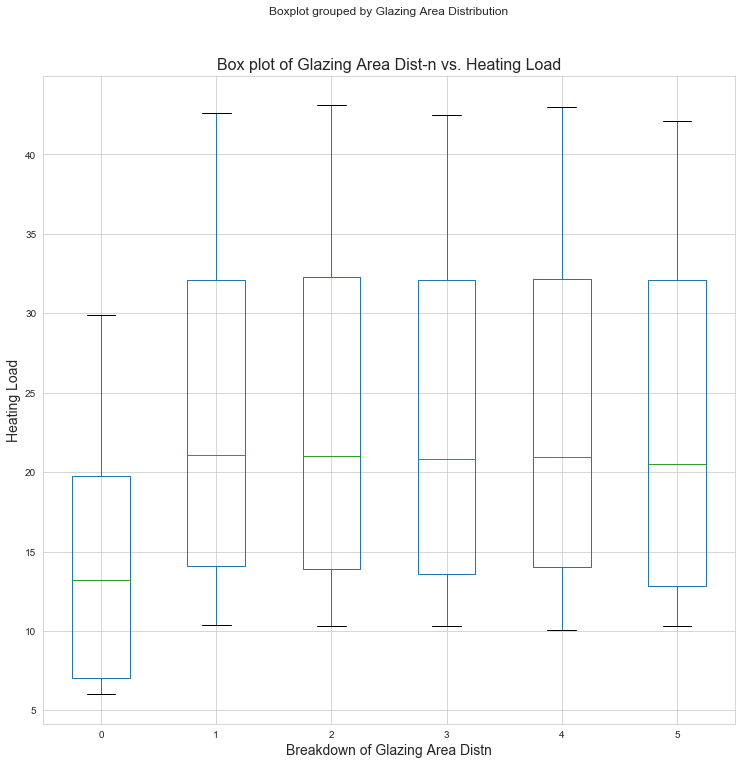  
>> 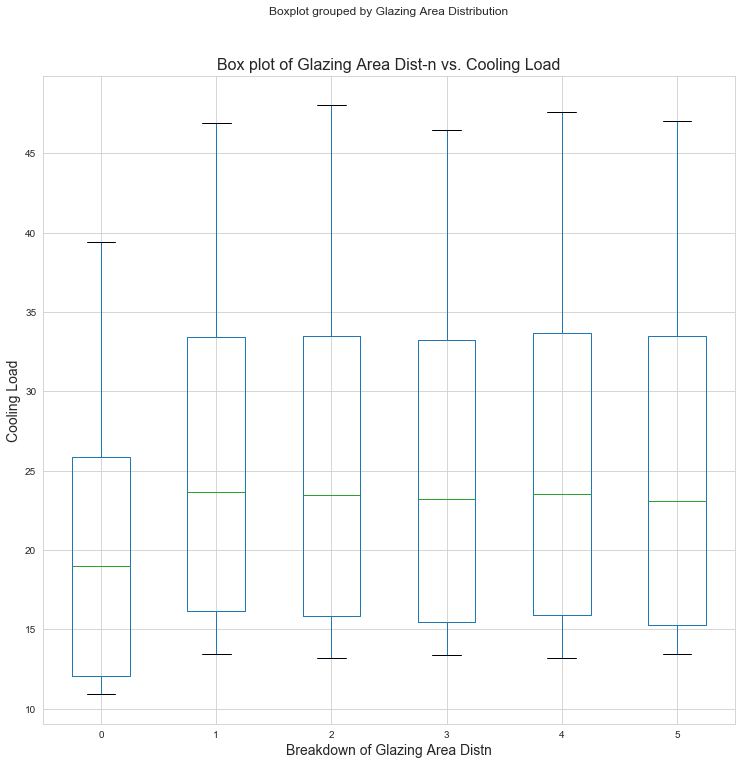

### FEATURE CORRELATION 2    
> Correlations exist between the 'Surface Area' and 'Relative Compactness' features with respect to in-building efficiencies.  
  
> Evaluating the surface area feature, for both Heating and Cooling Loads (efficiencies), reflects 2 distinct clusters of data. Those buildings having less surface area have higher efficiencies, where those buildings with higher surface areas have lower efficiencies. This is reflected in the box plots below.

>> 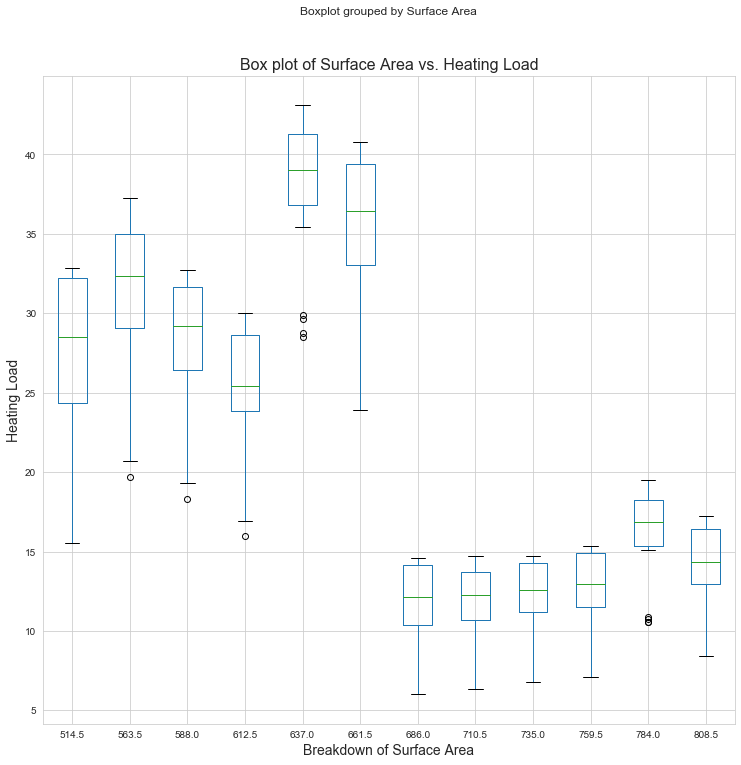  
>> 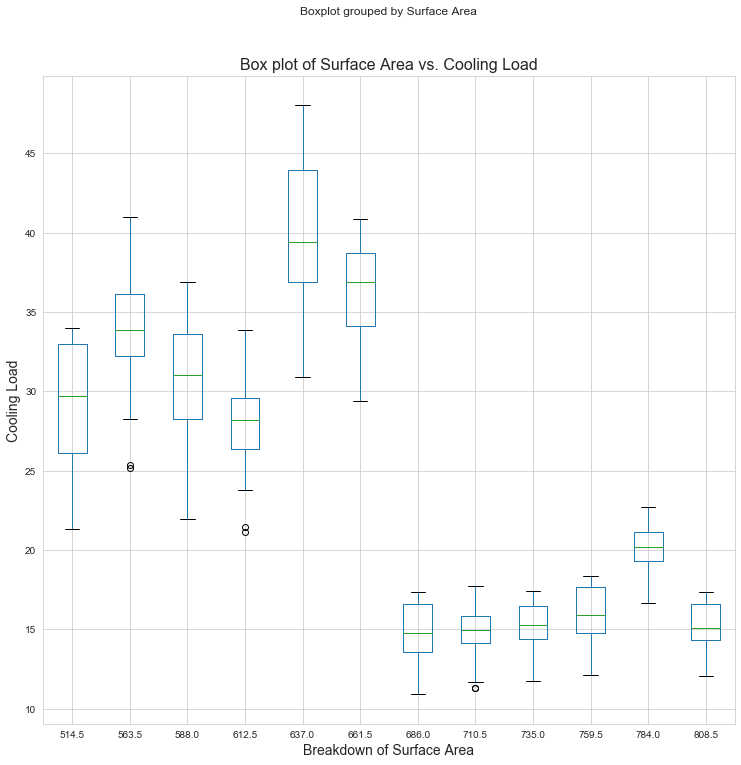

>> <div style="text-align: justify"><font color=blue>Furthermore, examination of the relative compactness feature with repsect to in-building efficiencies also shows distinct clustering characteristics, for when the relative compactness increases, so do the heating and cooling efficiencies, and vise-versa:</font></div>

>> 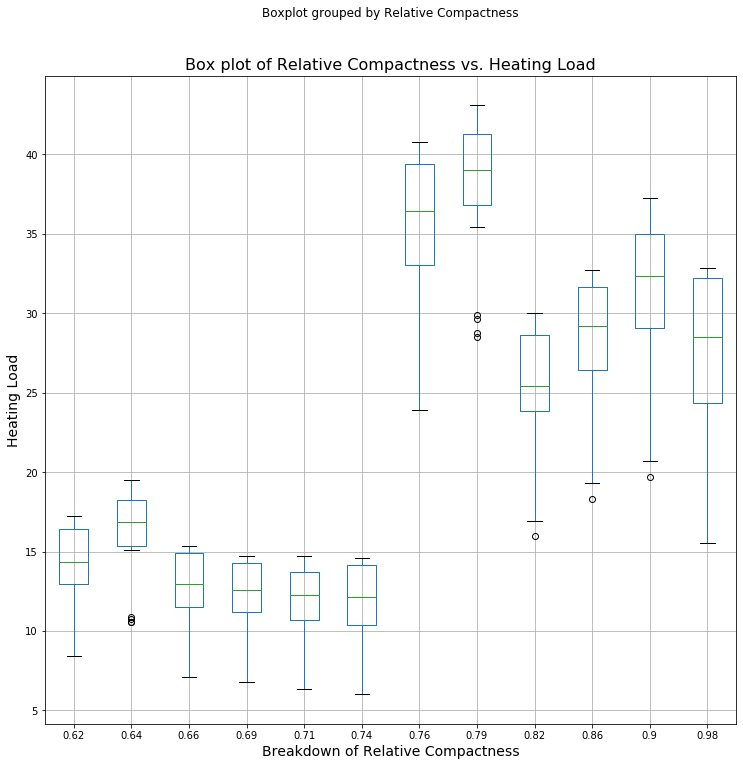  
>> 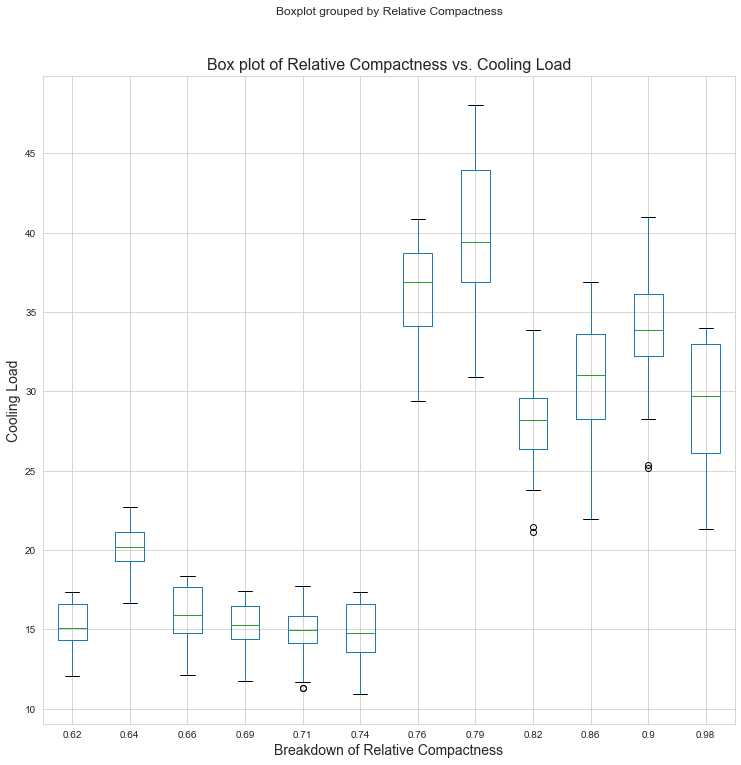

>> <div style="text-align: justify"><font color=blue> An additional dimension can be visualized by way of a violin plot  using the prior discussed features. When comparing relative compactness and surface area, it is like-wise shown, below, that the surface area feature is like-wise correlated by way of emplying shading to the plot:</font></div>

>> 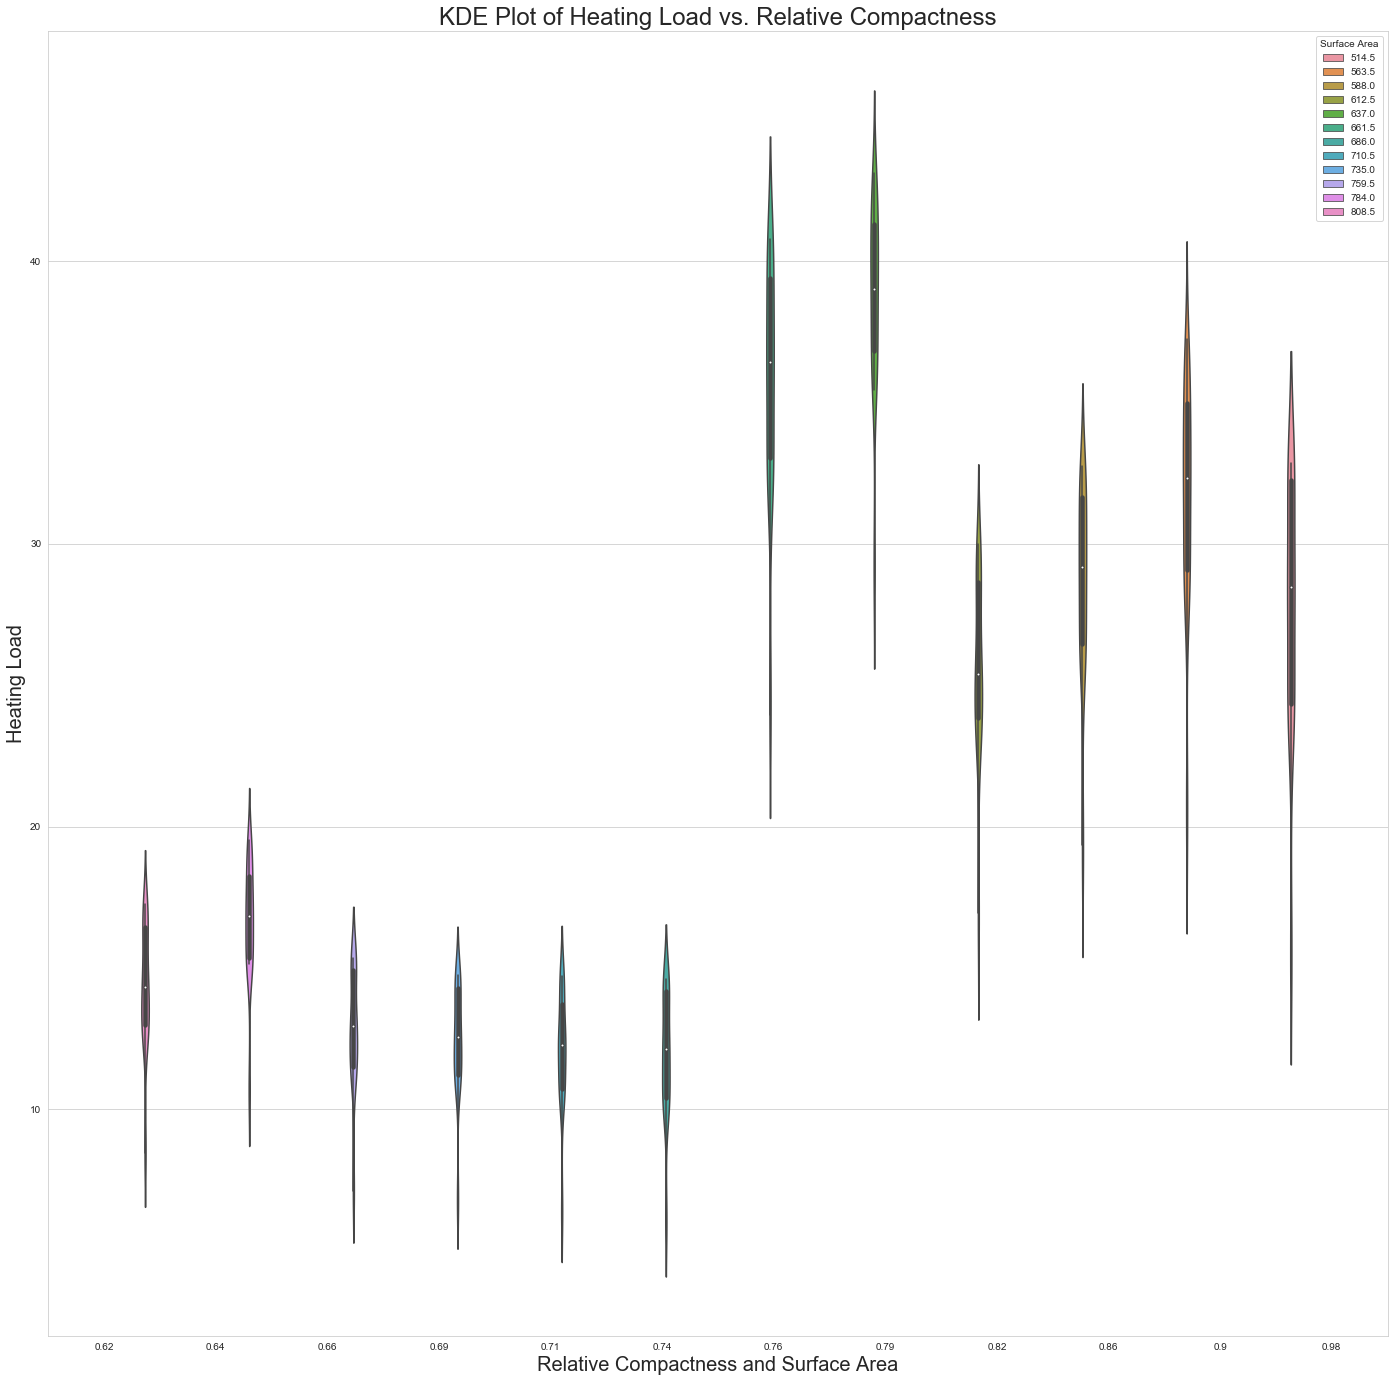  
>> 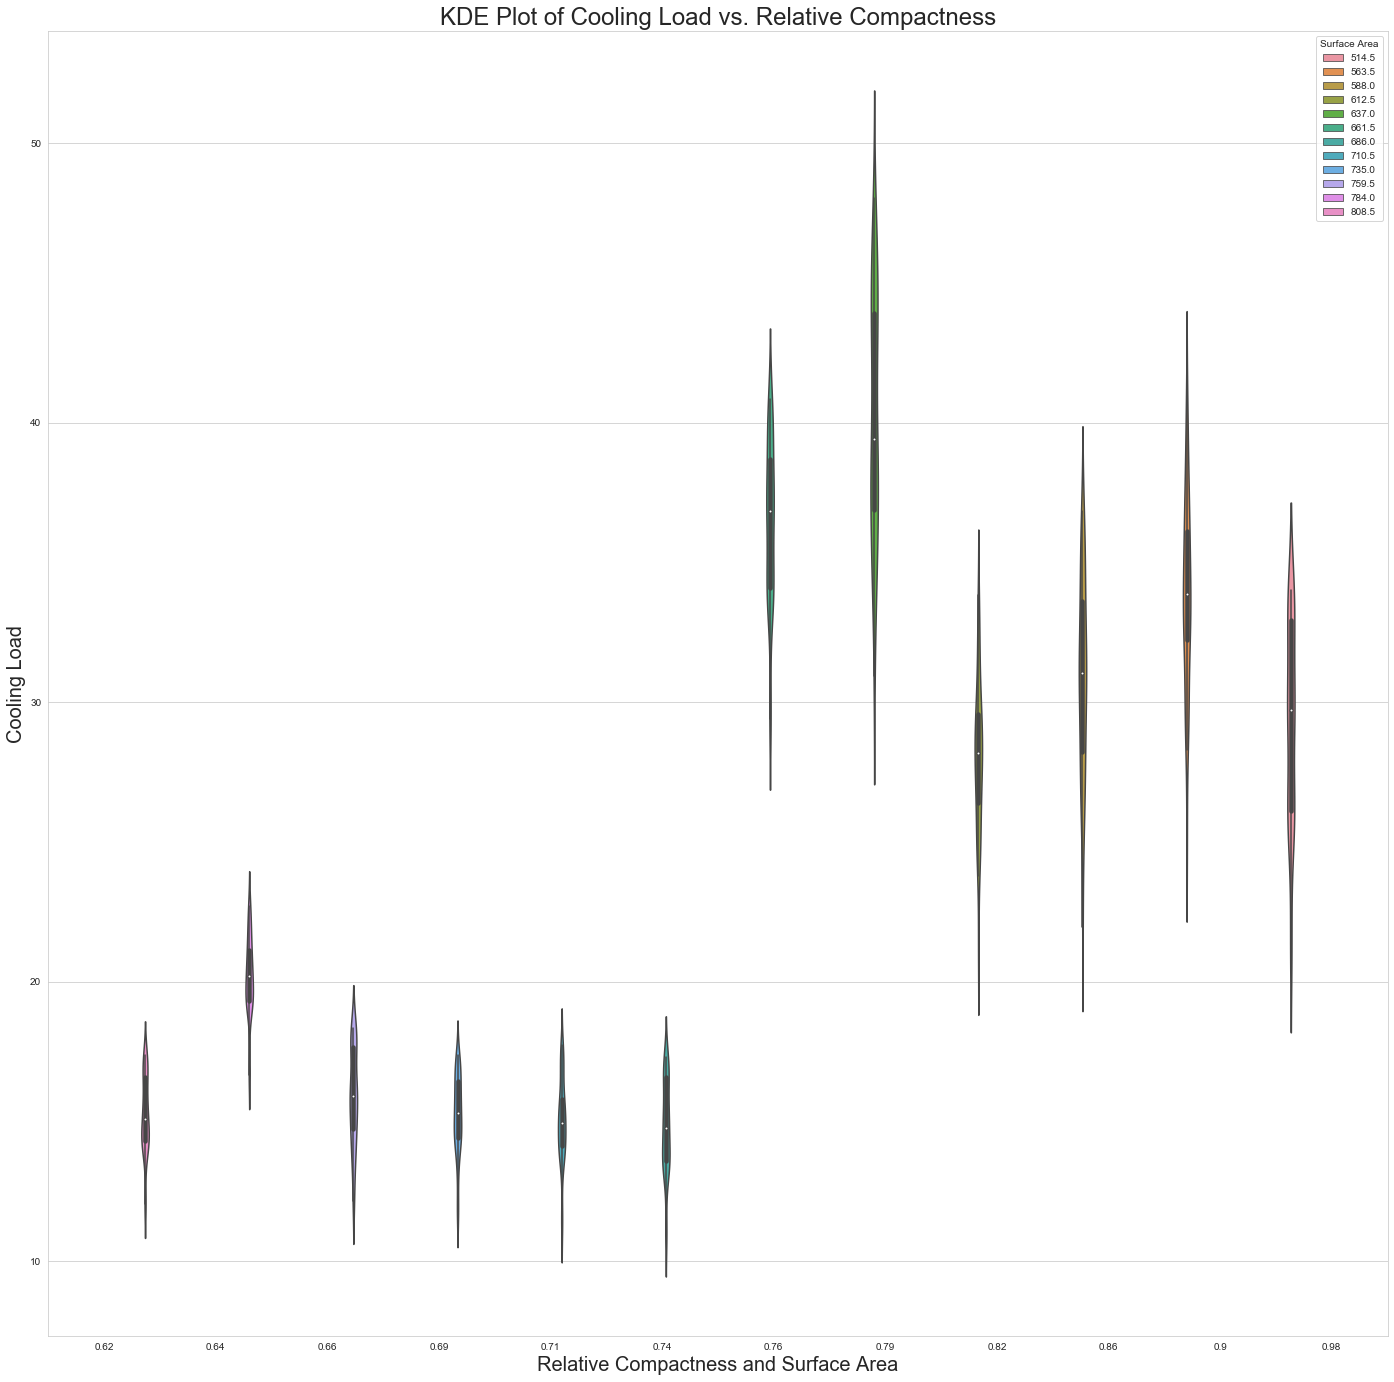

### FEATURE CORRELATION 3  
> Correlations exist between the 'Overall Height' and 'Wall Area' features with respect to in-building efficiencies.  
  
> Another interesting but subtle correlation of the in-building efficiencies pertains to the overall height and the wall area features. In the plot below, the wall area is shown via box plot to have some variance across the dataset, where the smallest of wall areas reflect reduced efficiencies. Thereafter, the increasing wall area magnitudes  give a winder spread of increasing efficiencies.

>> 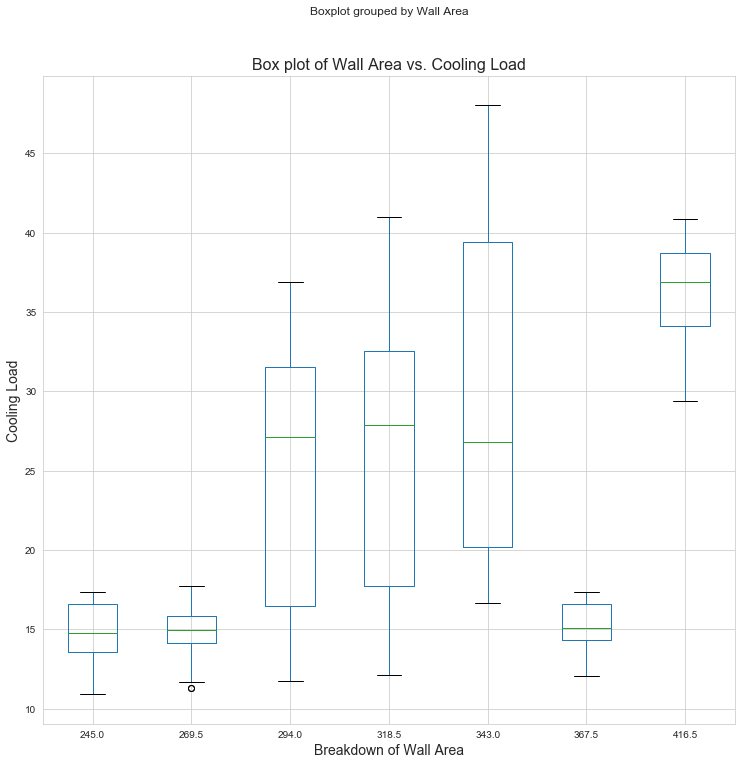

> In the following box plot, a view of the overall beuilding height data and cooling load is given, where the overall building height feature clearly correlates into 2 clusters of efficiency.  
  
> It is also observed that the taller buildings have a larger spread of wall area magnitudes.

>> 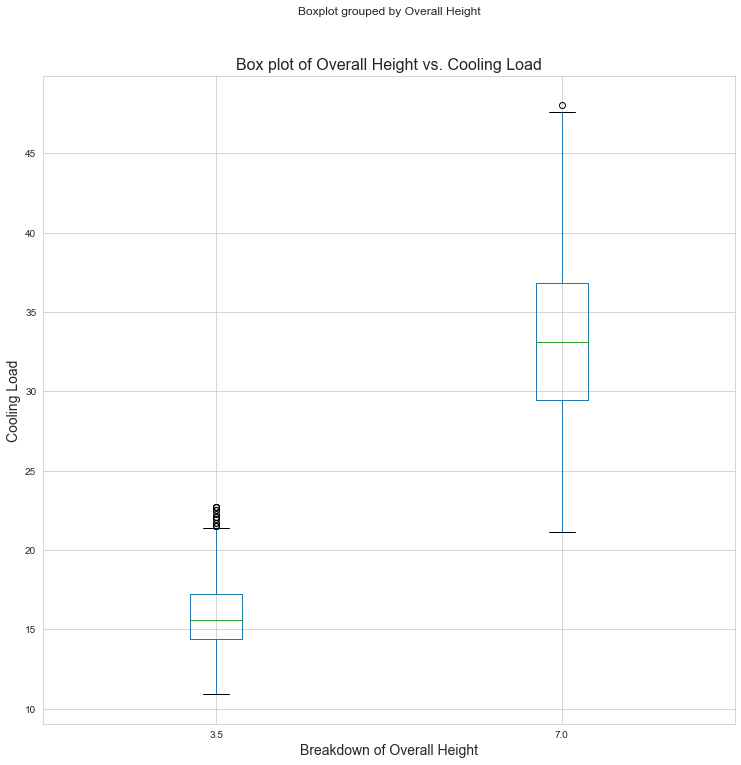  
>> 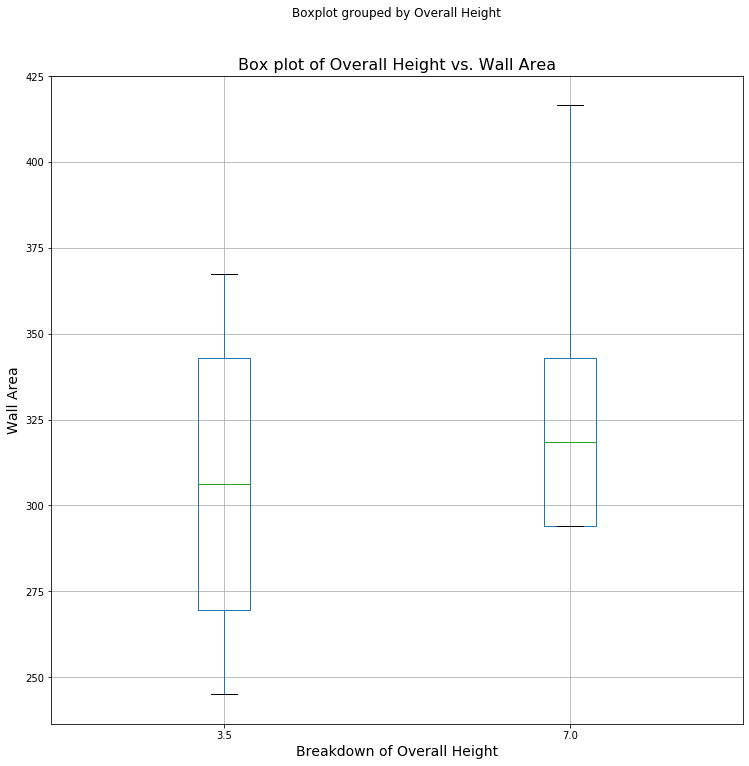

> When the overall building height and wall areas are compared alongside the cooling load efficiency, it is shown in the violin plot below, that the wall area is indeed correlated. By examination of the color codes, we observe that as the overall height increases so does the wall area with in increasing in-building efficiency.

>> 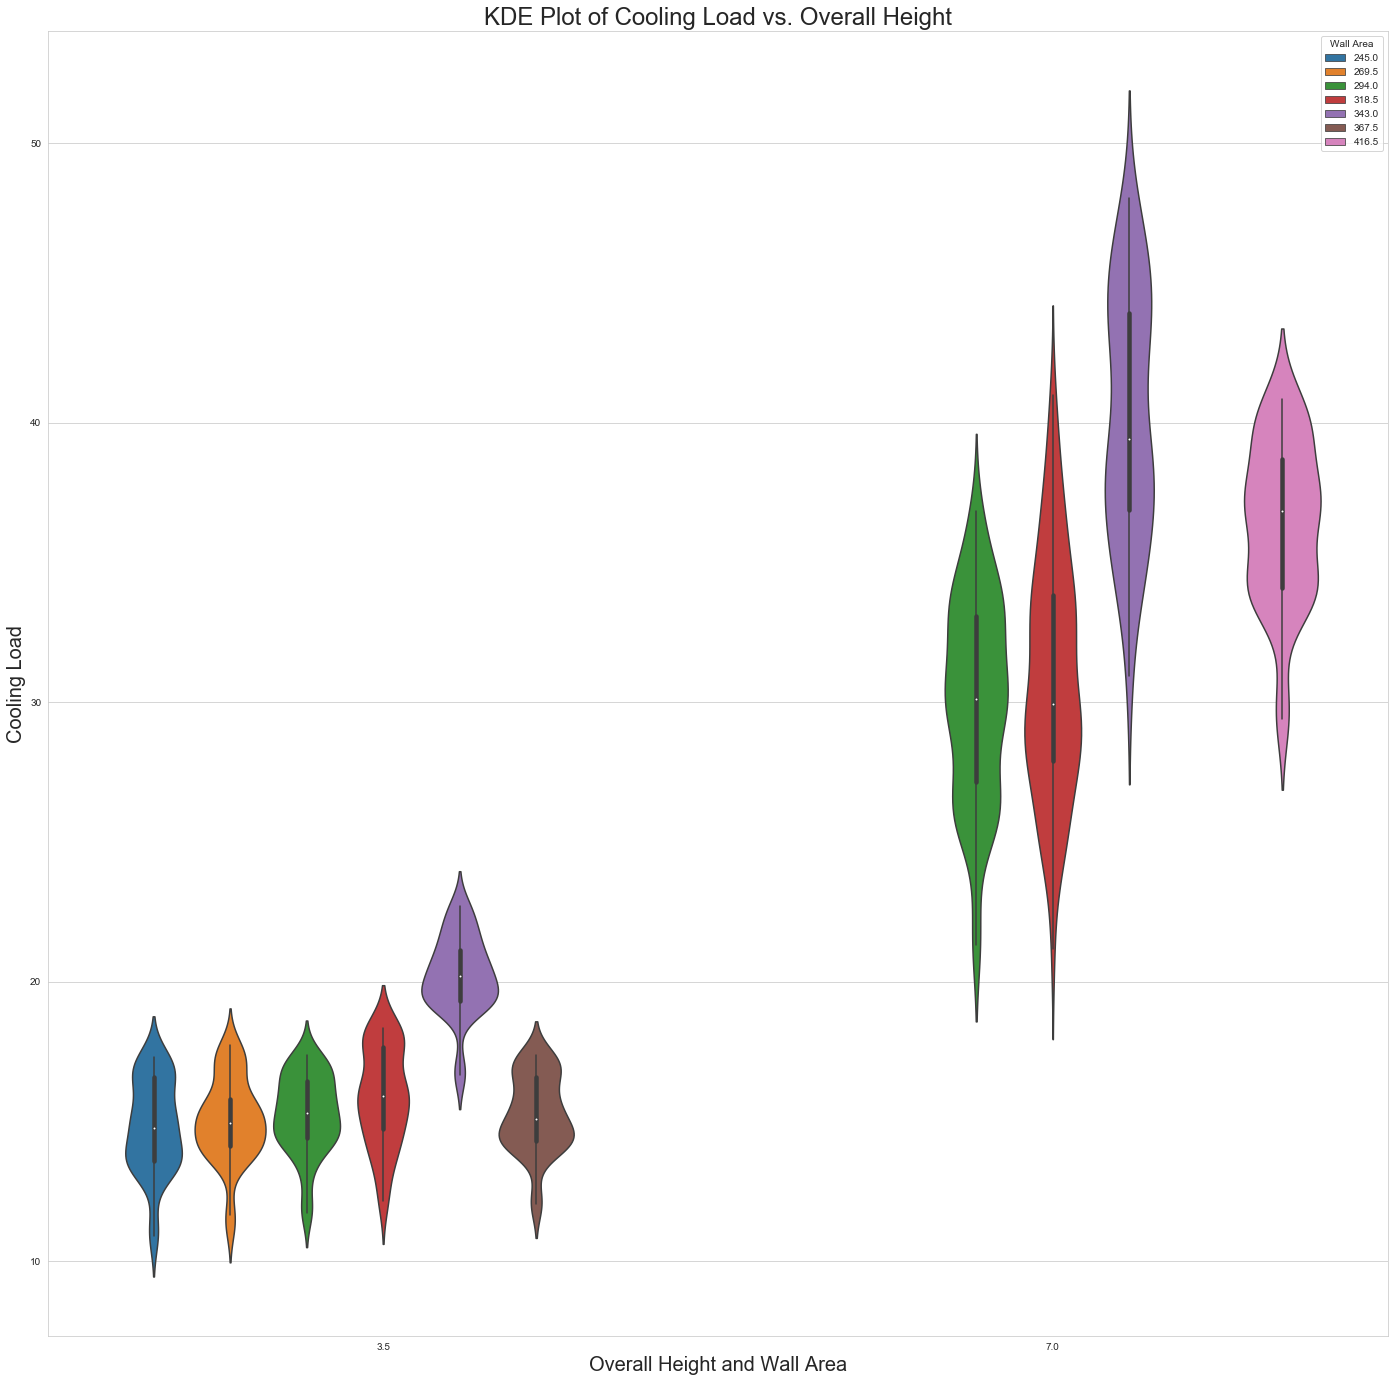